Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China
Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###
[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.581543
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 50.9367905, gradient norm = 0.7097586 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 53.3211746, gradient norm = 0.4745872 (50 iterations in 0.007s)
[t-SNE] Iteration 150: error = 46.9856148, gradient norm = 0.7517045 (50 iterations in 0.007s)
[t-SNE] Iteration 200: error = 52.4838028, gradient norm = 0.4999242 (50 iterations in 

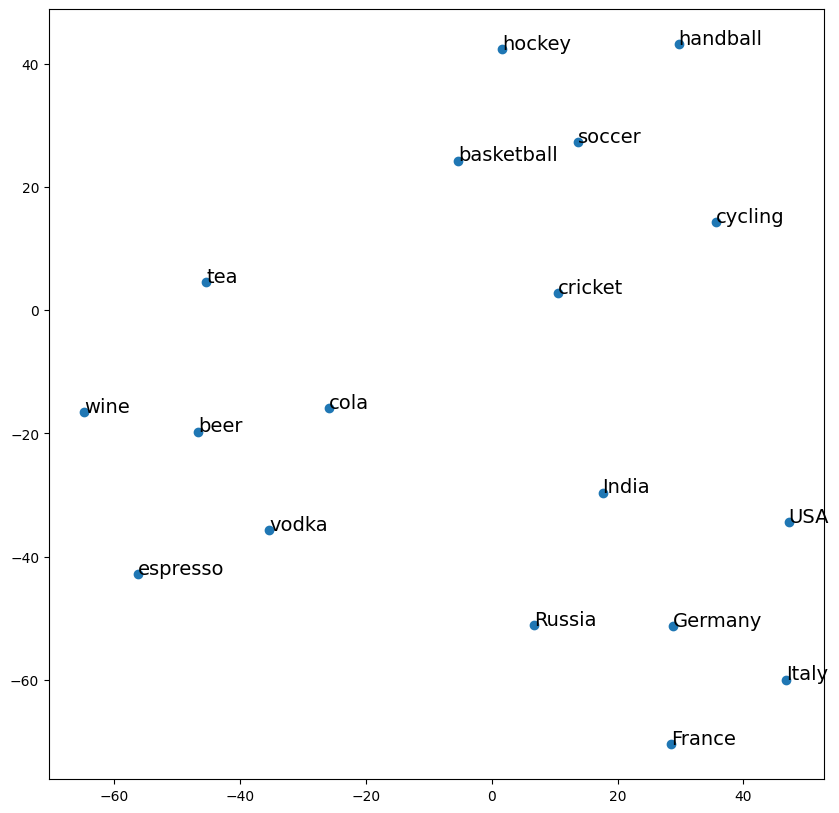

In [1]:
%matplotlib inline

import os
import gensim
import zipfile
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(10, 10)

from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

#model downloaded from kaggle
#url as of 27-11-2024: https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300?resource=download

path = './datasets/GoogleNews-vectors-negative300.zip'

#unzipping
unzipped = glob.glob('./datasets/extracted/*.bin')[0]
if not unzipped:
    if not os.path.isdir('./datasets/extracted'):
        os.mkdir('./datasets/extracted')
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall('./datasets/extracted')

unzipped = glob.glob('./datasets/extracted/*.bin')[0]

#open model


model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

model.most_similar(positive=['espresso'])

#model definition
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b + c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

for country in 'Italy', 'France', 'India', 'China':
    print('%s is the capital of %s' % 
          (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung':
    products = A_is_to_B_as_C_is_to(
        ['Starbucks', 'Apple'], 
        ['Starbucks_coffee', 'iPhone'], 
        company, topn=3)
    print('%s -> %s' % 
          (company, ', '.join(products)))

beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']

items = beverages + countries + sports
len(items)

#assign to vectors
item_vectors = [(item, model[item]) 
                    for item in items
                    if item in model]

len(item_vectors)

#Now use TSNE for clustering

vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

#plotting
x=tsne[:,0]
y=tsne[:,1]
fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size=14)

plt.show()